##  Testing Assumptions
1. State assumptions
2. Check assumptions (with figures)
    1. residuals
    2. correlations
    3. \# of modes
 
### Step 1: State assumptions

1. We assume that graphs are sampled according to: $x_i \stackrel{iid}{\sim} F$. This is both an independent and identical assumption.

2. We assume that edges in the graphs are independent: $F_{X|0} = ER(p_0) = Bern(p_0)^{V \times V}$.

3. We assume there is a class conditional difference across subject genders.

### Step 2: Check assumptions

For independent graphs, check that off diagonal covariance is approximately 0. <br/>
$x_i \stackrel{iid}{\sim} F$<br/>
$(x_1, x_2, ..., x_n) \sim F = \prod_i^n F_i$ <br/>
$F_i = F_j, \forall i,j$


For identical graphs, check the optimal number of clusters and see if that is 1. <br/>
$F = \prod_j^J F_j, J < n$ <br/>
$\prod_j^J w_jF_j(\theta)$ <br/>

For iid edges, repeat the above on population of all edges (covariance between edges)<br/>
$F_{X|0} = ER(p_0) = Bern(p_0)^{V \times V}$ <br/>
$F_{X|1} = ER(p_1) = Bern(p_1)^{V \times V}$

For class differences, fit the model using least squares regression. See if the model is normal and plot $\hat{y}$ vs. $y$.<br/>
$y = \beta x + \epsilon$, $\epsilon \sim \mathcal{N}(\mu, \epsilon)$ <br/>
$||y - \beta x|| - \epsilon \sim \mathcal{N}$<br/>
$p_1 \neq p_2$


### Setup Step

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import csv
import igraph as ig

%matplotlib inline

# Initializing dataset names
dnames = list(['../data/KKI2009'])
print "Dataset: " + ", ".join(dnames)

# Getting graph names
fs = list()
for dd in dnames:
        fs.extend([root+'/'+file for root, dir, files in os.walk(dd) for file in files])
fs = fs[1:]
def loadGraphs(filenames, rois, printer=False):
    A = np.zeros((rois, rois, len(filenames)))
    for idx, files in enumerate(filenames):
        if printer:
            print "Loading: " + files
        g = ig.Graph.Read_GraphML(files)
        tempg = g.get_adjacency(attribute='weight')
        A[:,:,idx] = np.asarray(tempg.data)
        
    return A

# Load X
X = loadGraphs(fs, 70)
print X.shape

# Load Y
ys = csv.reader(open('../data/kki42_subjectinformation.csv'))
y = [y[5] for y in ys]
y = [1 if x=='F' else 0 for x in y[1:]]

Dataset: ../data/KKI2009
(70, 70, 42)


#### Independent Graph Assumption

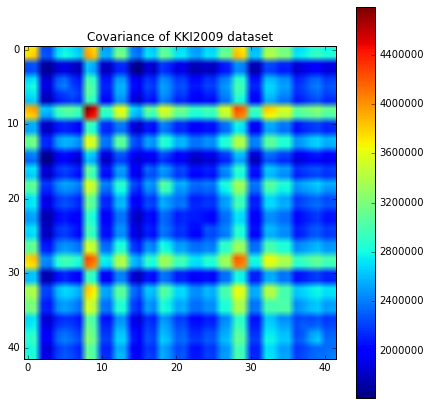

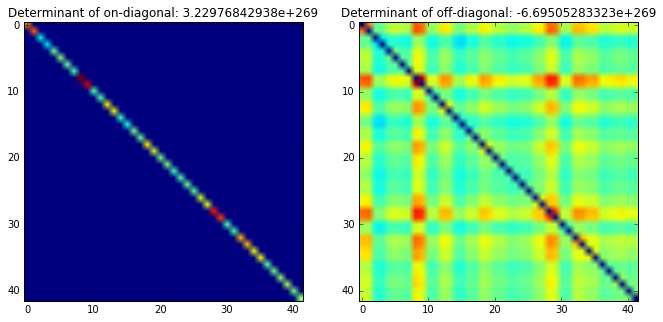

Ratio of on- and off-diagonal determinants: -0.482411193732


In [60]:
vectorized = np.reshape(X, (X.shape[0]**2, X.shape[2])).T
covar = np.cov(vectorized)

plt.figure(figsize=(7,7))
plt.imshow(covar)
plt.title('Covariance of KKI2009 dataset')
plt.colorbar()
plt.show()

diag = covar.diagonal()*np.eye(covar.shape[0])
hollow = covar-diag
d_det = np.linalg.det(diag)
h_det = np.linalg.det(hollow)

plt.figure(figsize=(11,8))
plt.subplot(121)
plt.imshow(diag)
plt.clim([0, np.max(covar)])
plt.title('Determinant of on-diagonal: ' + str(d_det))
plt.subplot(122)
plt.imshow(hollow)
plt.clim([0, np.max(covar)])
plt.title('Determinant of off-diagonal: ' + str(h_det))
plt.show()

print "Ratio of on- and off-diagonal determinants: " + str(d_det/h_det)

From the above, we conclude that the assumption that the graphs were independent is false. This is because the off-diagonal components of the covariance are highly significant in the cross-graph covariance matrix.

#### Identical Graph Assumption

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
Fitting and evaluating model with 1 clusters.
Fitting and evaluating model with 2 clusters.
Fitting and evaluating model with 3 clusters.
Fitting and evaluating model with 4 clusters.
Fitting and evaluating model with 5 clusters.
Fitting and evaluating model with 6 clusters.
Fitting and evaluating model with 7 clusters.
Fitting and evaluating model with 8 clusters.
Fitting and evaluating model with 9 clusters.
Fitting and evaluating model with 10 clusters.
Fitting and evaluating model with 11 clusters.
Fitting and evaluating model with 12 clusters.
Fitting and evaluating model with 13 clusters.
Fitting and evaluating model with 14 clusters.
Fitting and evaluating model with 15 clusters.


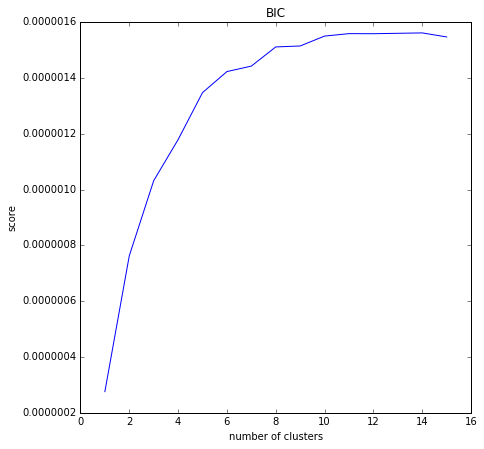

[ 3625489.06541763  1311273.92601775   969072.23280773   848052.65413098
   742063.36006552   702730.04708446   693160.44085673   661649.63391952
   660172.69226909   645052.27406954   641438.27480989   641536.23165542
   640939.84297423   640354.25406094   646339.44916119]


In [93]:
import sklearn.mixture
i = np.linspace(1,15,15,dtype='int')
print i
bic = np.array(())
for idx in i:
    print "Fitting and evaluating model with " + str(idx) + " clusters."
    gmm = sklearn.mixture.GMM(n_components=idx,n_iter=1000,covariance_type='diag')
    gmm.fit(vectorized)
    bic = np.append(bic, gmm.bic(vectorized))
plt.figure(figsize=(7,7))
plt.plot(i, 1.0/bic)
plt.title('BIC')
plt.ylabel('score')
plt.xlabel('number of clusters')
plt.show()
print bic

From the above we observe that, since the elbow of the bic curve lies at 6, that our data may not have been sampled identically from one distribution. This assumption based on the evidence provided is also false.

#### Independent Edge Assumption

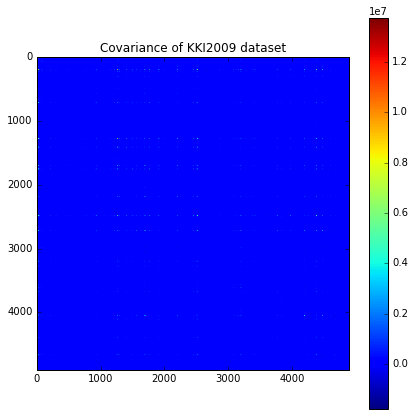

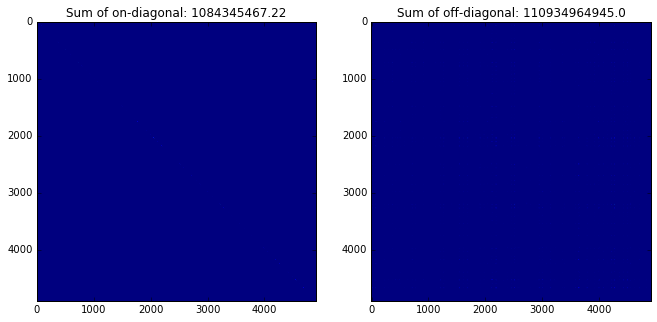

Ratio of on- and off-diagonal covariance sums: 0.00977460503781


In [84]:
vect = np.reshape(X, (X.shape[0]**2, X.shape[2]))
covar = np.cov(vect)

plt.figure(figsize=(7,7))
plt.imshow(covar)
plt.title('Covariance of KKI2009 dataset')
plt.colorbar()
plt.show()

diag = covar.diagonal()*np.eye(covar.shape[0])
hollow = covar-diag
d_det = np.sum(diag)
h_det = np.sum(hollow)

plt.figure(figsize=(11,8))
plt.subplot(121)
plt.imshow(diag)
plt.clim([0, np.max(covar)])
plt.title('Sum of on-diagonal: ' + str(d_det))
plt.subplot(122)
plt.imshow(hollow)
plt.clim([0, np.max(covar)])
plt.title('Sum of off-diagonal: ' + str(h_det))
plt.show()

print "Ratio of on- and off-diagonal covariance sums: " + str(d_det/h_det)

From the above, we can conclude that the edges are not independent of one another, as the ratio of on- to off-diagonal covariance is very small. This assumption is false.

#### Identical Edge Assumption

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
Fitting and evaluating model with 1 clusters.
Fitting and evaluating model with 2 clusters.
Fitting and evaluating model with 3 clusters.
Fitting and evaluating model with 4 clusters.
Fitting and evaluating model with 5 clusters.
Fitting and evaluating model with 6 clusters.
Fitting and evaluating model with 7 clusters.
Fitting and evaluating model with 8 clusters.
Fitting and evaluating model with 9 clusters.
Fitting and evaluating model with 10 clusters.
Fitting and evaluating model with 11 clusters.
Fitting and evaluating model with 12 clusters.
Fitting and evaluating model with 13 clusters.
Fitting and evaluating model with 14 clusters.
Fitting and evaluating model with 15 clusters.


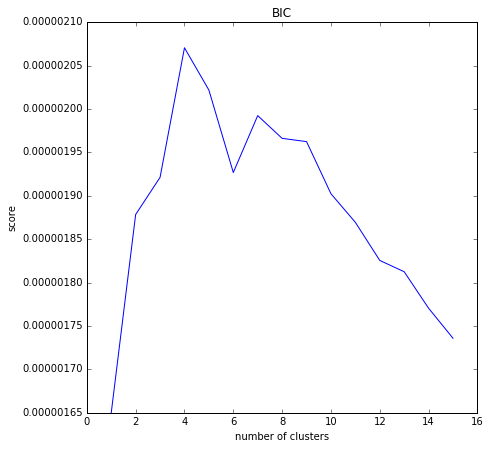

[ 606050.29134651  532357.69714136  520497.74824725  482964.97110153
  494605.68546606  518990.52675286  501910.05849653  508602.18318195
  509575.15289305  525658.04068646  534925.45732864  547785.15565048
  551723.36441103  564818.65417722  576078.8699319 ]


In [92]:
import sklearn.mixture
i = np.linspace(1,15,15,dtype='int')
print i
bic2 = np.array(())
for idx in i:
    print "Fitting and evaluating model with " + str(idx) + " clusters."
    gmm = sklearn.mixture.GMM(n_components=idx,n_iter=1000,covariance_type='diag')
    gmm.fit(vect.T)
    bic2 = np.append(bic2, gmm.bic(vect.T))
plt.figure(figsize=(7,7))
plt.plot(i, 1.0 / bic2)
plt.title('BIC')
plt.ylabel('score')
plt.xlabel('number of clusters')
plt.show()
print bic2

Looking at the bic curve, we observe that the optimal number of clusters is 5, indicating that edges are not in fact identically distributed. This assumptions appears to be false.

#### Class Conditional Edge Probability Assumption

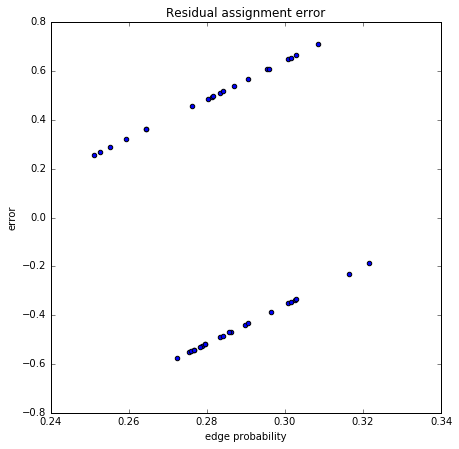

In [173]:
import scipy.stats as ss
ya = np.array(y)

# clf = sklm.LinearRegression()
# print vectorized.T.shape
edgeprob = 1.0*np.sum(1.0*(vectorized.T>0),1)/4900
# print edgeprob
# print ya.shape
# vals = clf.fit(edgeprob.T, ya)
# slope = clf.coef_
# intercept = clf.intercept_

vals = ss.linregress(edgeprob, ya)
m = vals[0]
c = vals[1]



def comp_value(m, c, data):
    return m.T*data + c

resi = np.array(())
for idx, subj in enumerate(ya):
    temp = comp_value(m, c, edgeprob[idx])
    resi = np.append(resi, subj - temp)
    
plt.figure(figsize=(7,7))
plt.scatter(edgeprob, resi)
plt.title('Residual assignment error')
plt.xlabel('edge probability')
plt.ylabel('error')
plt.show()

From the above we can see quite plainly that our classifier fails to separate subjects based on their edge probability. Thus, this assumption is also false.